1. Row_df 만들기
csv는 kaggle 출처

In [1]:
import pandas as pd

df1 = pd.read_csv('.\\dataset\\hate_speech_data.csv')
df2 = pd.read_csv('.\\dataset\\hate_speech_binary_dataset2.csv')
df1.drop('Unnamed: 0', inplace=True, axis=1)

df = pd.concat((df1, df2), ignore_index=True)
display(df.head(5))


,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


In [3]:
import sys
!{sys.executable} -m pip install pandas matplotlib scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

df1 = pd.read_csv('.\\dataset\\hate_speech_data.csv')
df2 = pd.read_csv('.\\dataset\\hate_speech_binary_dataset2.csv')
df1.drop('Unnamed: 0', inplace=True, axis=1)

df = pd.concat((df1, df2), ignore_index=True)
display(df.head(5))


,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


2. 결측치 제거

In [5]:

df.dropna(axis=0, inplace=True)
df.isnull().sum(axis=0)
display(df.head(5))

,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


In [6]:
import numpy as np

count_data = []
for i in range(len(df)):
    count=0
    data = df.iloc[i, 0]
    
    for j in data:
        count+=1
    count_data.append(count)

count_data = np.array(count_data)
df['문자 개수'] = count_data

In [7]:
display(df.head(5))

,문장,혐오 여부,문자 개수
0,지금 어디 계세요?,0,10
1,한국 시간에 시계 맞췄어?,0,14
2,햄버거 두 개랑 콜라 주세요.,0,16
3,우리는 밤새 춤추고 노래했다.,0,16
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0,26


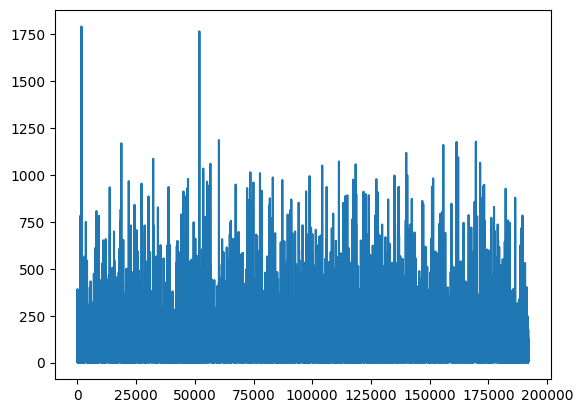

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['문자 개수'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191995 entries, 0 to 191999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   문장      191995 non-null  object
 1   혐오 여부   191995 non-null  int64 
 2   문자 개수   191995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ MB


2. 데이터 분포 비교
혐오 여부의 0과1 에대한 실제 계수와 비율 비교


In [10]:
zero = (df['혐오 여부'] == 0)
one = (df['혐오 여부'] == 1)
df_count = df.count()
zero_count = df.loc[zero, ['혐오 여부']].count()
zero_rate = zero_count / df_count

one_count = df.loc[one, ['혐오 여부']].count()
one_rate = one_count / df_count




display(zero_rate['혐오 여부'], one_rate['혐오 여부'])
display(zero_count['혐오 여부'], one_count['혐오 여부'])


np.float64(0.4739654678507253)

np.float64(0.5260345321492748)

np.int64(90999)

np.int64(100996)

In [11]:
df['문자 개수'].describe()

count    191995.000000
mean         39.172244
std          50.901776
min           1.000000
25%          15.000000
50%          26.000000
75%          44.000000
max        1791.000000
Name: 문자 개수, dtype: float64

3. 이상치 확인 및 제거

In [12]:
filt = df['문자 개수'] > 500

df[filt].count()

문장       369
혐오 여부    369
문자 개수    369
dtype: int64

In [13]:
df = df.drop(index=df[filt].index)
display(df.head(5), df.describe())

,문장,혐오 여부,문자 개수
0,지금 어디 계세요?,0,10
1,한국 시간에 시계 맞췄어?,0,14
2,햄버거 두 개랑 콜라 주세요.,0,16
3,우리는 밤새 춤추고 노래했다.,0,16
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0,26


,혐오 여부,문자 개수
count,191626.000000,191626.000000
mean,0.527032,37.913154
std,0.499270,41.354690
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,500.000000


4. train/valid 나누기

In [14]:
all = df['문장'].count()
train_len = int(all*0.8)
train = df.iloc[0:train_len]
valid = df.iloc[train_len:]

display(train.tail(5), valid.head(5))

,문장,혐오 여부,문자 개수
153600,라이언 고슬링이 나온다는 이유로만 본 영화인데 이런 여운을 주다니...,1,39
153601,"시리즈의 기원이면서, 1편의 힘과 임팩트는 시리즈가 계속 굴러가게 만든 원동력.",1,44
153602,50년대에 이런 연출이 가능하다니 어떤 경지를 보는 것 같다. 시대를 역행한 작품,1,45
153603,당신은 지금 행복합니까,1,12
153604,"노래,춤이 잘 어우러지고..45년 전 영화라는게 안 믿기네요^o^",1,36


,문장,혐오 여부,문자 개수
153605,명대사 어떤상황에서도 자존심은 잃지마라 (김주승),1,27
153606,진쨔 재밌어 요ㅠㅠㅠ 정말정말,1,16
153607,우연히 만날수있는 경우의수도 있어서 ㅁㅈㅎ,0,23
153608,과거(사연)는 필요없다. 있는 그대로 바라보면 될 뿐이다.,1,32
153609,얘 탈홍어임 아프리카 방송했을떄 봤는데 전향서쓴거 ㅇㅈ,0,30


In [15]:
display(train.describe(), valid.describe())

,혐오 여부,문자 개수
count,153300.000000,153300.000000
mean,0.527795,37.911409
std,0.499228,41.467011
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,500.000000


,혐오 여부,문자 개수
count,38326.000000,38326.000000
mean,0.523979,37.920133
std,0.499431,40.902871
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,498.000000


5. 모델의 입력 및 출력 고정
x축은 문장
y축은 혐오 여부

In [16]:
x = train['문장']
y = train['혐오 여부']

In [17]:
display(x.head(5))

0                    지금 어디 계세요?
1                한국 시간에 시계 맞췄어?
2              햄버거 두 개랑 콜라 주세요.
3              우리는 밤새 춤추고 노래했다.
4    무엇보다도, 스트레스를 줄이는 것이 중요합니다.
Name: 문장, dtype: object

6. 데이터 전처리
글자단위, 2~3글자, feature은 최대 5000

튜닝관점
1) char -> word
2) 2~3글자를 1~3글자로
3) feature을 10000로


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(2,3), # 2~3글자 조합
    max_features=5000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

print(y_train, y_valid)

7. 분류기 학습
TF-IDF로 수치화된 문장 벡터를 이용해 실제로 “혐오냐 아니냐”를 예측하는 분류 모델을 학습
선형 SVM(LinearSVC) 를 사용

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))

valid accuracy: 0.9425194385012785
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18244
           1       0.95      0.95      0.95     20082

    accuracy                           0.94     38326
   macro avg       0.94      0.94      0.94     38326
weighted avg       0.94      0.94      0.94     38326



8. 모델 평가

8-1. 틀린행만 모으기
모델이 틀린 문장, 정답, 모델에 대한 답이 나옴

In [ ]:
import pandas as pd

# 예측이랑 정답이 다른 위치 찾기
wrong_mask = y_valid != y_pred

# valid DF에서 그 행들만 뽑기
wrong_df = valid.loc[wrong_mask].copy()

# 예측값도 같이 보고 싶으니까 컬럼으로 붙이기
wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

display(wrong_df.head(20))


,문장,혐오 여부,문자 개수,y_true,y_pred
153605,명대사 어떤상황에서도 자존심은 잃지마라 (김주승),1,27,1,0
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153678,태세전환...,0,7,0,1
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153696,푸른아이는 전설이었따,1,11,1,0
153739,... ㅎㅎ,0,6,0,1
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,44,0,1
153769,내가젤조아하는사유리다!,0,12,0,1
153792,아..아쉽슙뉘돠..,0,10,0,1


8-2. 혐오(1)인데 모델 예측 (0)
놓친 케이스

In [ ]:
miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
display(miss_hate.head(20))



,문장,혐오 여부,문자 개수,y_true,y_pred
153605,명대사 어떤상황에서도 자존심은 잃지마라 (김주승),1,27,1,0
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153696,푸른아이는 전설이었따,1,11,1,0
153857,평식이 지나 그리고 다은이 이것 셋은 좀 모자라거나 눈이 사시임이 분명.,1,40,1,0
153863,쫌도와줘라.열심히 해보겠다는데 그리고 이 다음번엔 좀 재밌는걸 (흥행류)시도하시길 ...,1,81,1,0
153906,두려움에만 떨고있으면 아무것도 변하지 않아,1,23,1,0
153935,퀴즈킹 어플 덕분에 한번더 재조명 되나~ ㅋㅋ,1,25,1,0
153951,암살범은 김선화(김소연)임 ㅋㅋㅋㅋ 김소연이 김승우도 죽임,1,32,1,0
153976,오우 형래형님 나오신거네,1,13,1,0


8-3. 혐오 아닌데(0) 모델 예측(1) 
과검출

In [ ]:
false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
display(false_hate.head(20))


,문장,혐오 여부,문자 개수,y_true,y_pred
153678,태세전환...,0,7,0,1
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153739,... ㅎㅎ,0,6,0,1
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,44,0,1
153769,내가젤조아하는사유리다!,0,12,0,1
153792,아..아쉽슙뉘돠..,0,10,0,1
153831,언젠가부터 좋은 아름다운 정의 착한 이런 단어들이 좆같은 의미로 다가온다,0,40,0,1
153839,귀가...,0,5,0,1
153876,예지야 참말로미안ㅜㅜ,0,11,0,1
153932,@이건또뭐 ㅜㅜ 아. . . 슬픈데 캐공감씨바ㅜㅜb,0,28,0,1


In [ ]:
print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

문장        2203
혐오 여부     2203
문자 개수     2203
y_true    2203
y_pred    2203
dtype: int64 

 문장        1103
혐오 여부     1103
문자 개수     1103
y_true    1103
y_pred    1103
dtype: int64 

 문장        1100
혐오 여부     1100
문자 개수     1100
y_true    1100
y_pred    1100
dtype: int64


9. 튜닝
feature 확장과 n-gram 하한 조정이 성능 향상에 기여

9-1. Default

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(2,3), # 2~3글자 조합
    max_features=5000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))



# 예측이랑 정답이 다른 위치 찾기
wrong_mask = y_valid != y_pred

# valid DF에서 그 행들만 뽑기
wrong_df = valid.loc[wrong_mask].copy()

# 예측값도 같이 보고 싶으니까 컬럼으로 붙이기
wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9306997860460262
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18244
           1       0.94      0.93      0.93     20082

    accuracy                           0.93     38326
   macro avg       0.93      0.93      0.93     38326
weighted avg       0.93      0.93      0.93     38326

문장        2656
혐오 여부     2656
문자 개수     2656
y_true    2656
y_pred    2656
dtype: int64 

 문장        1494
혐오 여부     1494
문자 개수     1494
y_true    1494
y_pred    1494
dtype: int64 

 문장        1162
혐오 여부     1162
문자 개수     1162
y_true    1162
y_pred    1162
dtype: int64


9-2. feature 5000 => 500000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(2,3), # 2~3글자 조합
    max_features=500000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))



# 예측이랑 정답이 다른 위치 찾기
wrong_mask = y_valid != y_pred

# valid DF에서 그 행들만 뽑기
wrong_df = valid.loc[wrong_mask].copy()

# 예측값도 같이 보고 싶으니까 컬럼으로 붙이기
wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9535824244638105
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18244
           1       0.96      0.95      0.96     20082

    accuracy                           0.95     38326
   macro avg       0.95      0.95      0.95     38326
weighted avg       0.95      0.95      0.95     38326

문장        1779
혐오 여부     1779
문자 개수     1779
y_true    1779
y_pred    1779
dtype: int64 

 문장        951
혐오 여부     951
문자 개수     951
y_true    951
y_pred    951
dtype: int64 

 문장        828
혐오 여부     828
문자 개수     828
y_true    828
y_pred    828
dtype: int64


9-3. range(2,3) => range(1,3) + feature
1,4이상 시도했으나 악화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(1,3), # 2~3글자 조합
    max_features=500000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))



# 예측이랑 정답이 다른 위치 찾기
wrong_mask = y_valid != y_pred

# valid DF에서 그 행들만 뽑기
wrong_df = valid.loc[wrong_mask].copy()

# 예측값도 같이 보고 싶으니까 컬럼으로 붙이기
wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9575744925116109
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     18244
           1       0.96      0.96      0.96     20082

    accuracy                           0.96     38326
   macro avg       0.96      0.96      0.96     38326
weighted avg       0.96      0.96      0.96     38326

문장        1626
혐오 여부     1626
문자 개수     1626
y_true    1626
y_pred    1626
dtype: int64 

 문장        803
혐오 여부     803
문자 개수     803
y_true    803
y_pred    803
dtype: int64 

 문장        823
혐오 여부     823
문자 개수     823
y_true    823
y_pred    823
dtype: int64


10. 다양한 feature 실험

최고점수: 50만
부담 적은 설정: 20만

20만 이상시 성능이 포화되는 경향

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

feature_sizes = [50_000, 100_000, 200_000, 300_000, 500_000]

results = []

for max_f in feature_sizes:
    print(f"\n=== max_features = {max_f} ===")
    vec = TfidfVectorizer(
        analyzer='char',
        ngram_range=(1, 3),   # 네가 9-3에서 성능 잘 나온 설정
        max_features=max_f,
    )
    # train에만 fit
    vec.fit(train['문장'])
    X_tr = vec.transform(train['문장'])
    X_va = vec.transform(valid['문장'])

    clf = LinearSVC()
    clf.fit(X_tr, train['혐오 여부'])

    y_pred = clf.predict(X_va)

    acc = accuracy_score(valid['혐오 여부'], y_pred)
    print("valid accuracy:", acc)

    # 필요하면 주석 풀어서 클래스별도 보기
    # print(classification_report(valid['혐오 여부'], y_pred))

    results.append((max_f, acc))

print("\n--- 요약 ---")
for max_f, acc in results:
    print(max_f, acc)



=== max_features = 50000 ===
valid accuracy: 0.953973803684183

=== max_features = 100000 ===
valid accuracy: 0.9556436883577728

=== max_features = 200000 ===
valid accuracy: 0.9568961018629651

=== max_features = 300000 ===
valid accuracy: 0.9572874810833377

=== max_features = 500000 ===
valid accuracy: 0.9575744925116109

--- 요약 ---
50000 0.953973803684183
100000 0.9556436883577728
200000 0.9568961018629651
300000 0.9572874810833377
500000 0.9575744925116109


11. 가중치 변경
클래스 1(혐오)에 대해 class_weight를 1.0 → 1.2로 높였을 때, 전체 정확도는 0.9569 → 0.9560으로 소폭 감소했으나, 혐오 클래스의 재현율은 0.9617까지 개선되었다. 따라서 운영 시 ‘혐오 누락 최소화’가 목표라면 1.1~1.2 구간이 타협점이다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# 너가 성능 잘 나왔던 설정 쓰자
vec = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1, 3),
    max_features=200_000,   # 실용선. 500_000 써도 됨
)
vec.fit(train['문장'])
X_tr = vec.transform(train['문장'])
X_va = vec.transform(valid['문장'])

y_tr = train['혐오 여부']
y_va = valid['혐오 여부']

weights_to_try = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
reports = {}

for w in weights_to_try:
    clf = LinearSVC(class_weight={0:1.0, 1:w})
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_va)
    acc = accuracy_score(y_va, y_pred)

    print(f"{w=}, acc={acc:.4f}")
    reports[w] = classification_report(y_va, y_pred, digits=4)


w=1.0, acc=0.9569
w=1.1, acc=0.9565
w=1.2, acc=0.9560
w=1.3, acc=0.9559
w=1.4, acc=0.9557
w=1.5, acc=0.9556
w=2.0, acc=0.9550

=== detail for w=1.2 ===
              precision    recall  f1-score   support

           0     0.9575    0.9498    0.9536     18244
           1     0.9547    0.9617    0.9582     20082

    accuracy                         0.9560     38326
   macro avg     0.9561    0.9557    0.9559     38326
weighted avg     0.9560    0.9560    0.9560     38326



12. final

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(1,3), # 2~3글자 조합
    max_features=500000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC(class_weight={0: 1.0, 1: 1.2})
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))



# 예측이랑 정답이 다른 위치 찾기
wrong_mask = y_valid != y_pred

# valid DF에서 그 행들만 뽑기
wrong_df = valid.loc[wrong_mask].copy()

# 예측값도 같이 보고 싶으니까 컬럼으로 붙이기
wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9572874810833377
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     18244
           1       0.96      0.96      0.96     20082

    accuracy                           0.96     38326
   macro avg       0.96      0.96      0.96     38326
weighted avg       0.96      0.96      0.96     38326

문장        1637
혐오 여부     1637
문자 개수     1637
y_true    1637
y_pred    1637
dtype: int64 

 문장        756
혐오 여부     756
문자 개수     756
y_true    756
y_pred    756
dtype: int64 

 문장        881
혐오 여부     881
문자 개수     881
y_true    881
y_pred    881
dtype: int64


In [ ]:
display(false_hate.head(20))

,문장,혐오 여부,문자 개수,y_true,y_pred
153610,"이 사람, 재능기부로 어려운 학생들도 많이 도와주고 좋은 일은 많이 한 걸로 안다....",0,135,0,1
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153739,... ㅎㅎ,0,6,0,1
153748,하이바쓰지그랬어 ?아마몰랐을꺼야 ... 근대신고는왜허니 ? 심심하니?,0,38,0,1
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,44,0,1
153769,내가젤조아하는사유리다!,0,12,0,1
153788,천사,0,2,0,1
153792,아..아쉽슙뉘돠..,0,10,0,1
153831,언젠가부터 좋은 아름다운 정의 착한 이런 단어들이 좆같은 의미로 다가온다,0,40,0,1
153839,귀가...,0,5,0,1


In [ ]:
display(wrong_df.head(20))

,문장,혐오 여부,문자 개수,y_true,y_pred
153610,"이 사람, 재능기부로 어려운 학생들도 많이 도와주고 좋은 일은 많이 한 걸로 안다....",0,135,0,1
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153739,... ㅎㅎ,0,6,0,1
153748,하이바쓰지그랬어 ?아마몰랐을꺼야 ... 근대신고는왜허니 ? 심심하니?,0,38,0,1
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,44,0,1
153769,내가젤조아하는사유리다!,0,12,0,1
153788,천사,0,2,0,1
153792,아..아쉽슙뉘돠..,0,10,0,1


In [ ]:
display(miss_hate.head(20))

,문장,혐오 여부,문자 개수,y_true,y_pred
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153824,에라모르렜다 자폭이다 낄낄,1,14,1,0
153906,두려움에만 떨고있으면 아무것도 변하지 않아,1,23,1,0
153976,오우 형래형님 나오신거네,1,13,1,0
153987,샤를리즈 테론의 몸매가 죽이는데,1,17,1,0
154014,이 나라 지켜주셔서 정말 감사합니다..,1,21,1,0
154018,목소리도 이상한데 쾌걸조로리때매 주는거임,1,22,1,0
154030,쉴새없이 웃기네 ㅋㅋㅋㅋ 틈을 안주네 틈을 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1,42,1,0
154047,ㅋㅋ 영화제목이 자아임 게다가 2분 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1,34,1,0
